# Image Segmentation and Maskrcnn

In [ ]:
# Q1. What is image segmentation, and why is it important?

# answer
# Image segmentation is the process of dividing an image into meaningful regions. It helps in identifying object boundaries, separating background from foreground, and is crucial in applications like medical imaging, autonomous driving, and scene understanding.

In [ ]:
# Q2. Explain the difference between image classification, object detection, and image segmentation

# answer
# - Image Classification: Assigns a label to an entire image.
# - Object Detection: Identifies and localizes objects in an image with bounding boxes.
# - Image Segmentation: Classifies each pixel, providing precise object boundaries.

In [ ]:
# Q3. What is Mask R-CNN, and how is it different from traditional object detection models?

# answer
# Mask R-CNN is an extension of Faster R-CNN that adds a branch for predicting segmentation masks. It provides pixel-level object localization unlike traditional models that only return bounding boxes.

In [ ]:
# Q4. What role does the "RoIAlign" layer play in Mask R-CNN?

# answer
# RoIAlign ensures precise spatial alignment of features by avoiding quantization of RoI boundaries, improving mask accuracy compared to the earlier RoIPool method.

In [ ]:
# Q5. What are semantic, instance, and panoptic segmentation?

# answer
# - Semantic Segmentation: Labels each pixel based on object class.
# - Instance Segmentation: Differentiates between individual objects of the same class.
# - Panoptic Segmentation: Combines both semantic and instance segmentation.

In [ ]:
# Q6. Describe the role of bounding boxes and masks in image segmentation models

# answer
# Bounding boxes localize objects coarsely, while masks provide detailed pixel-wise outlines, enabling accurate segmentation of object shapes.

In [ ]:
# Q7. What is the purpose of data annotation in image segmentation?

# answer
# Data annotation creates labeled data with pixel-wise masks, essential for supervised learning in segmentation tasks.

In [ ]:
# Q8. How does Detectron2 simplify model training for object detection and segmentation tasks?

# answer
# Detectron2 offers modular, scalable implementations of state-of-the-art models with easy dataset registration, training loops, and evaluation APIs.

In [ ]:
# Q9. Why is transfer learning valuable in training segmentation models?

# answer
# Transfer learning allows models to leverage pre-trained weights, speeding up convergence and improving performance on small or custom datasets.

In [ ]:
# Q10. How does Mask R-CNN improve upon the Faster R-CNN model architecture?

# answer
# Mask R-CNN adds a segmentation branch to Faster R-CNN, enabling pixel-wise segmentation alongside bounding box detection.

In [ ]:
# Q11. What is meant by "from bounding box to polygon masks" in image segmentation?

# answer
# It refers to transitioning from coarse rectangular object localization to precise pixel-level or polygon-based boundaries for accurate segmentation.

In [ ]:
# Q12. How does data augmentation benefit image segmentation model training?

# answer
# Augmentation techniques like rotation, flipping, and scaling increase data diversity, improving generalization and robustness of segmentation models.

In [ ]:
# Q13. Describe the architecture of Mask R-CNN, focusing on the backbone, region proposal network (RPN), and segmentation mask head

# answer
# The backbone extracts features (e.g., ResNet), the RPN proposes candidate object regions, and the mask head predicts segmentation masks for each detected object.

In [ ]:
# Q14. Explain the process of registering a custom dataset in Detectron2 for model training

# answer
# You register a dataset using `register_coco_instances()` or `DatasetCatalog` and `MetadataCatalog`, specifying paths to images and annotations in COCO format.

In [ ]:
# Q15. What challenges arise in scene understanding for image segmentation, and how can Mask R-CNN address them?

# answer
# Challenges include overlapping objects and varying scales. Mask R-CNN's instance segmentation helps by segmenting each object separately.

In [ ]:
# Q16. How is the "IoU (Intersection over Union)" metric used in evaluating segmentation models?

# answer
# IoU measures overlap between predicted and ground-truth masks. A higher IoU indicates better segmentation performance.

In [ ]:
# Q17. Discuss the use of transfer learning in Mask R-CNN for improving segmentation on custom datasets

# answer
# Mask R-CNN can initialize from pre-trained weights (e.g., COCO), allowing quicker and more effective training on new datasets.

In [ ]:
# Q18. What is the purpose of evaluation curves, such as precision-recall curves, in segmentation model assessment?

# answer
# They help visualize model performance under various thresholds, showing trade-offs between precision and recall.

In [ ]:
# Q19. How do Mask R-CNN models handle occlusions or overlapping objects in segmentation?

# answer
# Each object is segmented separately, and the instance segmentation mask helps distinguish overlapping regions accurately.

In [ ]:
# Q20. Explain the impact of batch size and learning rate on Mask R-CNN model training

# answer
# Too large a batch may cause memory issues, too small may lead to noisy updates. Learning rate affects convergence speed and stability; must be tuned carefully.

In [ ]:
# Q21. Describe the challenges of training segmentation models on custom datasets, particularly in the context of Detectron2

# answer
# Challenges include data formatting, annotation quality, and hyperparameter tuning. Detectron2 helps via modular APIs and training utilities.

In [ ]:
# Q22. How does Mask R-CNN's segmentation head output differ from a traditional object detector’s output?

# answer
# Traditional detectors output bounding boxes and class scores; Mask R-CNN adds an extra branch to output a binary mask for each detected object.

# Practical

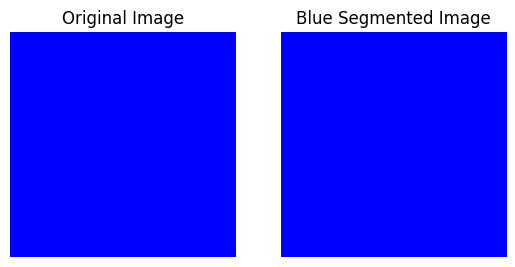

In [12]:
# Q1. Perform basic color-based segmentation to separate the blue color in an image

#code >
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_blue_color():
    # Create a dummy image with blue region
    image = np.zeros((200, 200, 3), dtype=np.uint8)
    image[:] = (255, 0, 0)  # Entire image blue (BGR format)

    # Convert to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define blue color range
    lower_blue = np.array([100, 150, 0])
    upper_blue = np.array([140, 255, 255])

    # Create mask
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Bitwise-AND mask and original image
    segmented = cv2.bitwise_and(image, image, mask=mask)

    return image, segmented

#example
image, segmented = segment_blue_color()
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
plt.title("Blue Segmented Image")
plt.axis('off')
plt.show()

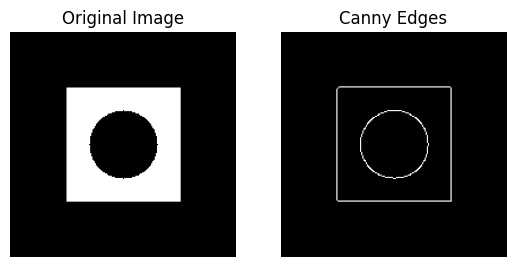

In [13]:
# Q2. Use edge detection with Canny to highlight object edges in an image loaded

#code >
import cv2
import numpy as np
import matplotlib.pyplot as plt

def canny_edge_detection():
    # Create a dummy image with shapes
    image = np.zeros((200, 200), dtype=np.uint8)
    cv2.rectangle(image, (50, 50), (150, 150), 255, -1)  # white square
    cv2.circle(image, (100, 100), 30, 0, -1)  # black circle inside

    # Apply Canny edge detection
    edges = cv2.Canny(image, 100, 200)

    return image, edges

#example
image, edges = canny_edge_detection()

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edges")
plt.axis('off')
plt.show()

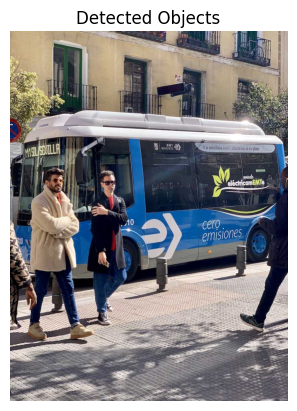

In [15]:
# Q3. Load a pretrained Mask R-CNN model from PyTorch and use it for object detection and segmentation on an image

#code >
import torch
import torchvision
from torchvision.models.detection import maskrcnn_resnet50_fpn, MaskRCNN_ResNet50_FPN_Weights
from PIL import Image
import requests
from io import BytesIO
import torchvision.transforms as T
import matplotlib.pyplot as plt

def mask_rcnn_segmentation():
    # Load pretrained Mask R-CNN with latest weights API
    weights = MaskRCNN_ResNet50_FPN_Weights.DEFAULT
    model = maskrcnn_resnet50_fpn(weights=weights)
    model.eval()

    # Load image from an online link
    url = "https://ultralytics.com/images/bus.jpg"
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert("RGB")

    # Transform image according to model's requirements
    transform = weights.transforms()
    img_tensor = transform(img)

    # Perform inference
    with torch.no_grad():
        predictions = model([img_tensor])

    return img, predictions

#example
img, predictions = mask_rcnn_segmentation()

# Display image
plt.imshow(img)
plt.axis("off")
plt.title("Detected Objects")
plt.show()

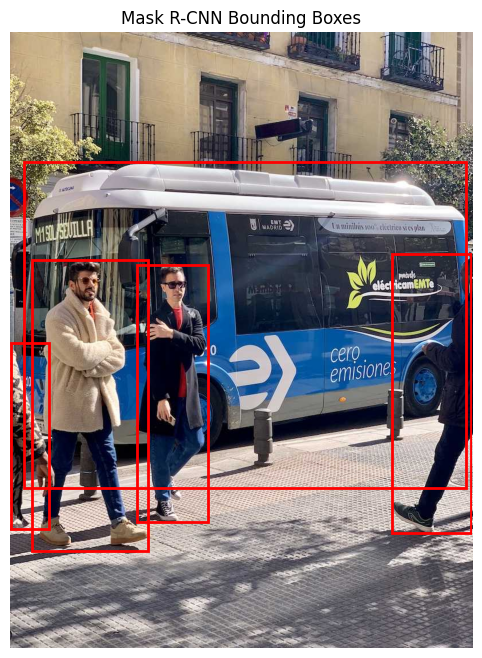

In [16]:
# Q4. Generate bounding boxes for each object detected by Mask R-CNN in an image

#code >
import torch
import torchvision
from torchvision.models.detection import maskrcnn_resnet50_fpn, MaskRCNN_ResNet50_FPN_Weights
from PIL import Image
import requests
from io import BytesIO
import torchvision.transforms as T
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def mask_rcnn_bounding_boxes(conf_threshold=0.5):
    # Load model with latest API
    weights = MaskRCNN_ResNet50_FPN_Weights.DEFAULT
    model = maskrcnn_resnet50_fpn(weights=weights)
    model.eval()

    # Load sample image
    url = "https://ultralytics.com/images/bus.jpg"
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert("RGB")

    # Transform
    transform = weights.transforms()
    img_tensor = transform(img)

    # Run inference
    with torch.no_grad():
        predictions = model([img_tensor])

    pred = predictions[0]
    boxes = pred["boxes"]
    scores = pred["scores"]

    # Draw bounding boxes above threshold
    fig, ax = plt.subplots(1, figsize=(12, 8))
    ax.imshow(img)

    for box, score in zip(boxes, scores):
        if score >= conf_threshold:
            x_min, y_min, x_max, y_max = box
            rect = patches.Rectangle(
                (x_min, y_min), x_max - x_min, y_max - y_min,
                linewidth=2, edgecolor="red", facecolor="none"
            )
            ax.add_patch(rect)

    plt.axis("off")
    plt.title("Mask R-CNN Bounding Boxes")
    plt.show()

#example
mask_rcnn_bounding_boxes()

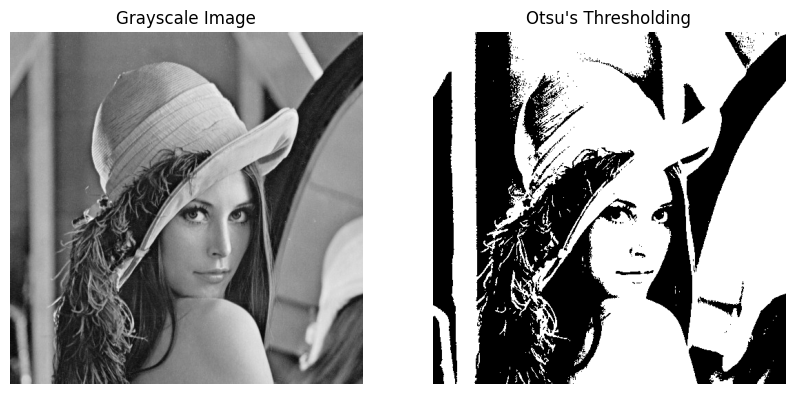

In [20]:
# Q5. Convert an image to grayscale and apply Otsu's thresholding method for segmentation

#code >
import cv2
import numpy as np
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

def otsu_threshold_segmentation():
    # Verified image link
    url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg"
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert("RGB")

    img_np = np.array(img)
    gray = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)

    # Apply Otsu's thresholding
    _, thresh_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(gray, cmap="gray")
    plt.title("Grayscale Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(thresh_img, cmap="gray")
    plt.title("Otsu's Thresholding")
    plt.axis("off")

    plt.show()

#example
otsu_threshold_segmentation()

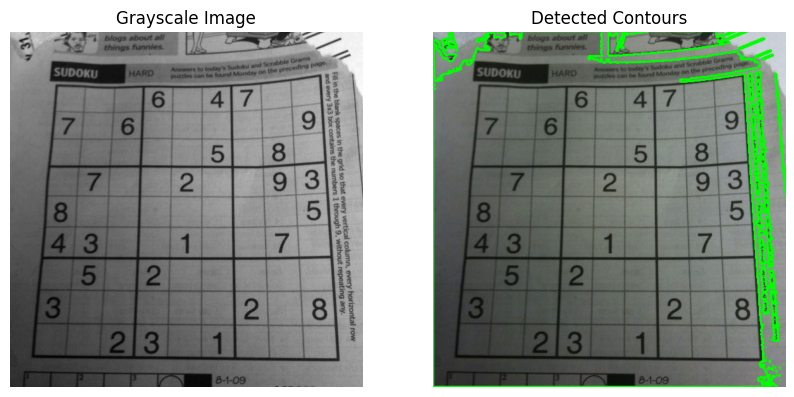

In [21]:
# Q6. Perform contour detection in an image to detect distinct objects or shapes

#code >
import cv2
import numpy as np
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

def contour_detection():
    # Verified image link
    url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/sudoku.png"
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert("RGB")
    img_np = np.array(img)

    # Convert to grayscale
    gray = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)

    # Threshold the image
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours
    contour_img = img_np.copy()
    cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(gray, cmap="gray")
    plt.title("Grayscale Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(contour_img)
    plt.title("Detected Contours")
    plt.axis("off")

    plt.show()

#example
contour_detection()

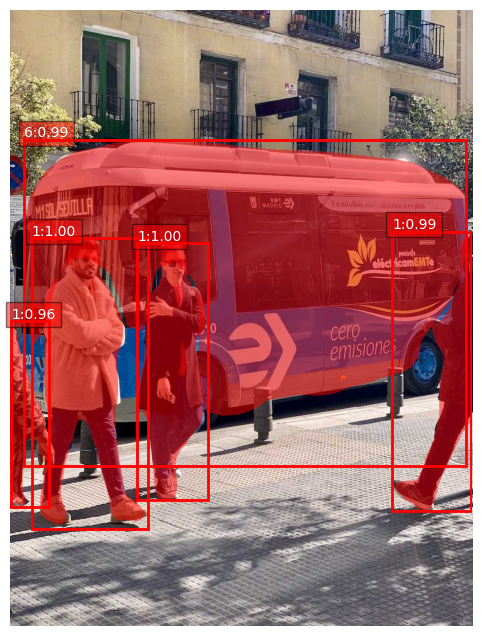

In [22]:
# Q7. Apply Mask R-CNN to detect objects and their segmentation masks in a custom image and display them
# code >
import torch
from torchvision.models.detection import maskrcnn_resnet50_fpn, MaskRCNN_ResNet50_FPN_Weights
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from io import BytesIO

def apply_mask_rcnn(image_url=None, local_image_path=None, score_threshold=0.5, use_gpu=False):
    device = torch.device("cuda" if torch.cuda.is_available() and use_gpu else "cpu")

    # Load model
    weights = MaskRCNN_ResNet50_FPN_Weights.DEFAULT
    model = maskrcnn_resnet50_fpn(weights=weights).to(device)
    model.eval()
    transforms = weights.transforms()

    # Load image
    if image_url:
        response = requests.get(image_url)
        img_pil = Image.open(BytesIO(response.content)).convert("RGB")
    elif local_image_path:
        img_pil = Image.open(local_image_path).convert("RGB")
    else:
        raise ValueError("Provide either image_url or local_image_path")

    img_tensor = transforms(img_pil).to(device)

    # Inference
    with torch.no_grad():
        outputs = model([img_tensor])

    # Visualize results
    outputs = [{k: v.to("cpu") for k, v in t.items()} for t in outputs]
    img = np.array(img_pil)

    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    ax = plt.gca()

    for box, score, label, mask in zip(outputs[0]['boxes'], outputs[0]['scores'], outputs[0]['labels'], outputs[0]['masks']):
        if score >= score_threshold:
            x1, y1, x2, y2 = box
            rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, color='red', linewidth=2)
            ax.add_patch(rect)
            ax.text(x1, y1 - 5, f"{label.item()}:{score:.2f}", color='white',
                    bbox=dict(facecolor='red', alpha=0.5))

            mask = mask[0].numpy()
            mask = mask > 0.5
            img[mask] = img[mask] * 0.5 + np.array([255, 0, 0]) * 0.5

    plt.imshow(img)
    plt.axis("off")
    plt.show()

# example
apply_mask_rcnn(image_url="https://ultralytics.com/images/bus.jpg", score_threshold=0.6, use_gpu=False)

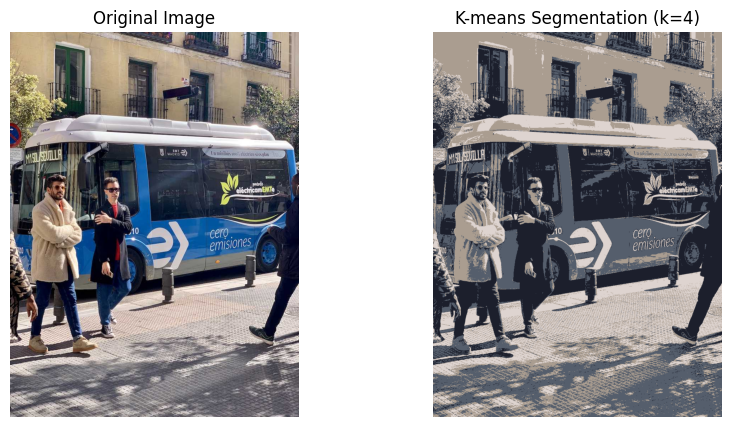

In [23]:
# Q8. Apply k-means clustering for segmenting regions in an image
# code >
import cv2
import numpy as np
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

def kmeans_image_segmentation(image_url=None, local_image_path=None, k=3):
    # Load image
    if image_url:
        response = requests.get(image_url)
        image = np.array(Image.open(BytesIO(response.content)).convert("RGB"))
    elif local_image_path:
        image = np.array(Image.open(local_image_path).convert("RGB"))
    else:
        raise ValueError("Provide either image_url or local_image_path")

    # Convert image to float32 and reshape
    Z = image.reshape((-1, 3))
    Z = np.float32(Z)

    # Define criteria for K-means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    _, labels, centers = cv2.kmeans(Z, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert centers to uint8 and reshape segmented image
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape((image.shape))

    # Display segmented image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image)
    plt.title(f"K-means Segmentation (k={k})")
    plt.axis("off")
    plt.show()

# example
kmeans_image_segmentation(image_url="https://ultralytics.com/images/bus.jpg", k=4)